In [1]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import precision_score

%matplotlib inline
plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 25,
        'axes.labelsize': 25,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'font.size': 20,
        'figure.figsize': (10, 7),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })

In [2]:
# Наши данные
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})
data.head()

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0


In [3]:
# Создаём дерево решений
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [4]:
# разбиваем данные на предикторы и таргет
X = data[['X_1', 'X_2']]
y = data.Y

In [5]:
# делаем фит
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

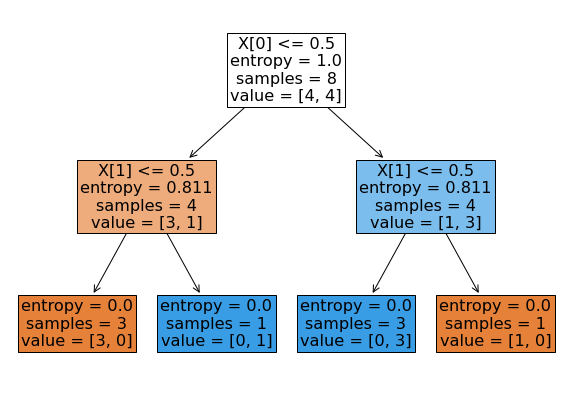

In [6]:
from sklearn.tree import plot_tree
# рисуем, что получилось
plot_tree(clf,filled=True);

## Entropy

<font size="3">
E - entropy, $p_i$ - probability of event i. For example titanic passenger is dead (0) or survived (1) 
    
$ E = - \sum_{i=1}^{n} p_i * log_2(p_i) $
    
If we know that there are 4 survived and 4 not survevd: $p_0 = p_1 = 1/2$ at all categories
    
$E = - \frac{1}{2} * log_2(\frac{1}{2}) - \frac{1}{2} * log_2(\frac{1}{2}) = \frac{1}{2} + \frac{1}{2} = 1$
    
After we classified passenger on two groups in which survived and dead are totaly separated, i.e. 4 out of 4 in
our sample is dead.

So $p_0 = 1$, $p_1 = 0$
    
And entropy is
    
$E = - 1 * log_2(1) - 0 * log_2(0) = 0 + 0 = 0$
</font>

## Information Gain

<font size="3">

The intitial entropy definition (see above) E = E(Y)
    
After we classified our events using some feature X we have two samples with new values of entropy
(hope this value is less than E(Y)) __condidition entropy__:
    
$ E(Y|X) = \frac{n_1}{N} * E_1 + \frac{n_2}{N} * E_2 $
    
N - total number of observations <br>
$n_1$ and $n_2$ - number of observations in two categories after cut applied on X
    
Information Gain after applying classification based on X feature
    
$ IG = E(Y) - E(Y|X) $
    
Example from course with $X_1$ feature: (xxxxoooo) $\rightarrow$ (xxxooo), (xo) <br>
$E_1 = E_2 = 1$
 
$ IG = 1 - (\frac{6}{8} * 1 + \frac{2}{8} * 1) = 0 $ 
    
    
With $X_2$ feature : (xxxooo) $\rightarrow$ (xooo), (xxxo) <br>
$E_1 = E_2 = 0.81$

 
$ IG = 1 - (\frac{4}{8} * 0.81 + \frac{4}{8} * 0.81) = 1 - 0.81 = 0.19 $ 
    
</font>

In [7]:
def entropy(probs):
    entropy = 0
    for i in probs:
        if i == 0:
            entropy += 0
        else:
            entropy -= i * np.log2(i)
    return entropy 

def infromation_gain(initial_entropy, n_obs, entropies):
    n_total = n_obs.sum()
    return initial_entropy - ((n_obs / n_total) * entropies).sum()

In [8]:
data = pd.read_csv('cats.csv')

In [9]:
data = data.replace({'собачка': 0, 'котик': 1})

In [10]:
data.loc[(data['Шерстист'] > 0.5) & (data['Вид'] == 0)]

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,0
1,1,1,1,0,0
2,2,1,1,0,0
3,3,1,1,0,0


In [11]:
for feature in ['Шерстист', 'Гавкает', 'Лазает по деревьям']:
    #
    n_dogs_init = data.loc[data['Вид'] == 0].shape[0]
    n_cats_init = data.loc[data['Вид'] == 1].shape[0]
    p_init = n_dogs_init / (n_dogs_init + n_cats_init)
    prob_init = np.array([p_init, 1-p_init])
    entropy_init = entropy(prob_init)
    print(f'Initial prob: {prob_init}')
    print(f'Initial entropy = {entropy_init}')
    n_dogs_0 = data.loc[(data[feature] <= 0.5) & (data['Вид'] == 0)].shape[0]
    n_cats_0 = data.loc[(data[feature] <= 0.5) & (data['Вид'] == 1)].shape[0]
    n_dogs_1 = data.loc[(data[feature] > 0.5) & (data['Вид'] == 0)].shape[0]
    n_cats_1 = data.loc[(data[feature] > 0.5) & (data['Вид'] == 1)].shape[0]
    #
    p0 = n_dogs_0 / (n_dogs_0 + n_cats_0)
    p1 = n_dogs_1 / (n_dogs_1 + n_cats_1)
    prob0 = np.array([p0, 1-p0])
    prob1 = np.array([p1, 1-p1])
    entropy0 = entropy(prob0)
    entropy1 = entropy(prob1)
    print(f'{feature} = 0: {prob0}')
    print(f'Entropy: {round(entropy0, 2)}')
    print(f'{feature} = 1: {prob1}')
    print(f'Entropy: {round(entropy1, 2)}')
    n_obs_0 = data.loc[data[feature] <= 0.5].shape[0]
    n_obs_1 = data.loc[data[feature] > 0.5].shape[0]
    n_observations = np.array([n_obs_0, n_obs_1])
    entropies = np.array([entropy0, entropy1])
    print(f'Information Gain = {round(infromation_gain(entropy_init, n_observations, entropies), 2)}')
    print(50*'-')

Initial prob: [0.4 0.6]
Initial entropy = 0.9709505944546686
Шерстист = 0: [0. 1.]
Entropy: 0.0
Шерстист = 1: [0.44444444 0.55555556]
Entropy: 0.99
Information Gain = 0.08
--------------------------------------------------
Initial prob: [0.4 0.6]
Initial entropy = 0.9709505944546686
Гавкает = 0: [0. 1.]
Entropy: 0.0
Гавкает = 1: [0.8 0.2]
Entropy: 0.72
Information Gain = 0.61
--------------------------------------------------
Initial prob: [0.4 0.6]
Initial entropy = 0.9709505944546686
Лазает по деревьям = 0: [1. 0.]
Entropy: 0.0
Лазает по деревьям = 1: [0. 1.]
Entropy: 0.0
Information Gain = 0.97
--------------------------------------------------


# Titanic

In [12]:
titanic_data = pd.read_csv('Titanic_dataset/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# check the missing data (isna and isnull are same?)
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# drop col with a lot of NaNs and other not interesting features
# and also drop Survived
X = titanic_data.drop(columns=['Survived', 'Cabin', 'Ticket', 'Name', 'PassengerId'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [15]:
# Now the target
y = titanic_data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
# Desision tree
clf = tree.DecisionTreeClassifier()

In [17]:
# Replace string varibales with set of (0, 1) variables
X = pd.get_dummies(X)

In [18]:
# Replace NaN values of age with median age of passengers
X = X.fillna({'Age': X.Age.median()})

In [19]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [20]:
# Train our model
clf.fit(X, y)

DecisionTreeClassifier()

[Text(0.3387752278645833, 0.9772727272727273, 'Sex_male <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.17348958333333334, 0.9318181818181818, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.07, 0.8863636363636364, 'Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.05333333333333334, 0.8409090909090909, 'Pclass <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04666666666666667, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08666666666666667, 0.8409090909090909, 'Fare <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.07333333333333333, 0.7954545454545454, 'Fare <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(0.06666666666666667, 0.75, 'Age <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.04666666666666667, 0.7045454545454546, 'SibSp <= 0.5\ngini = 0.14\nsamples = 66\n

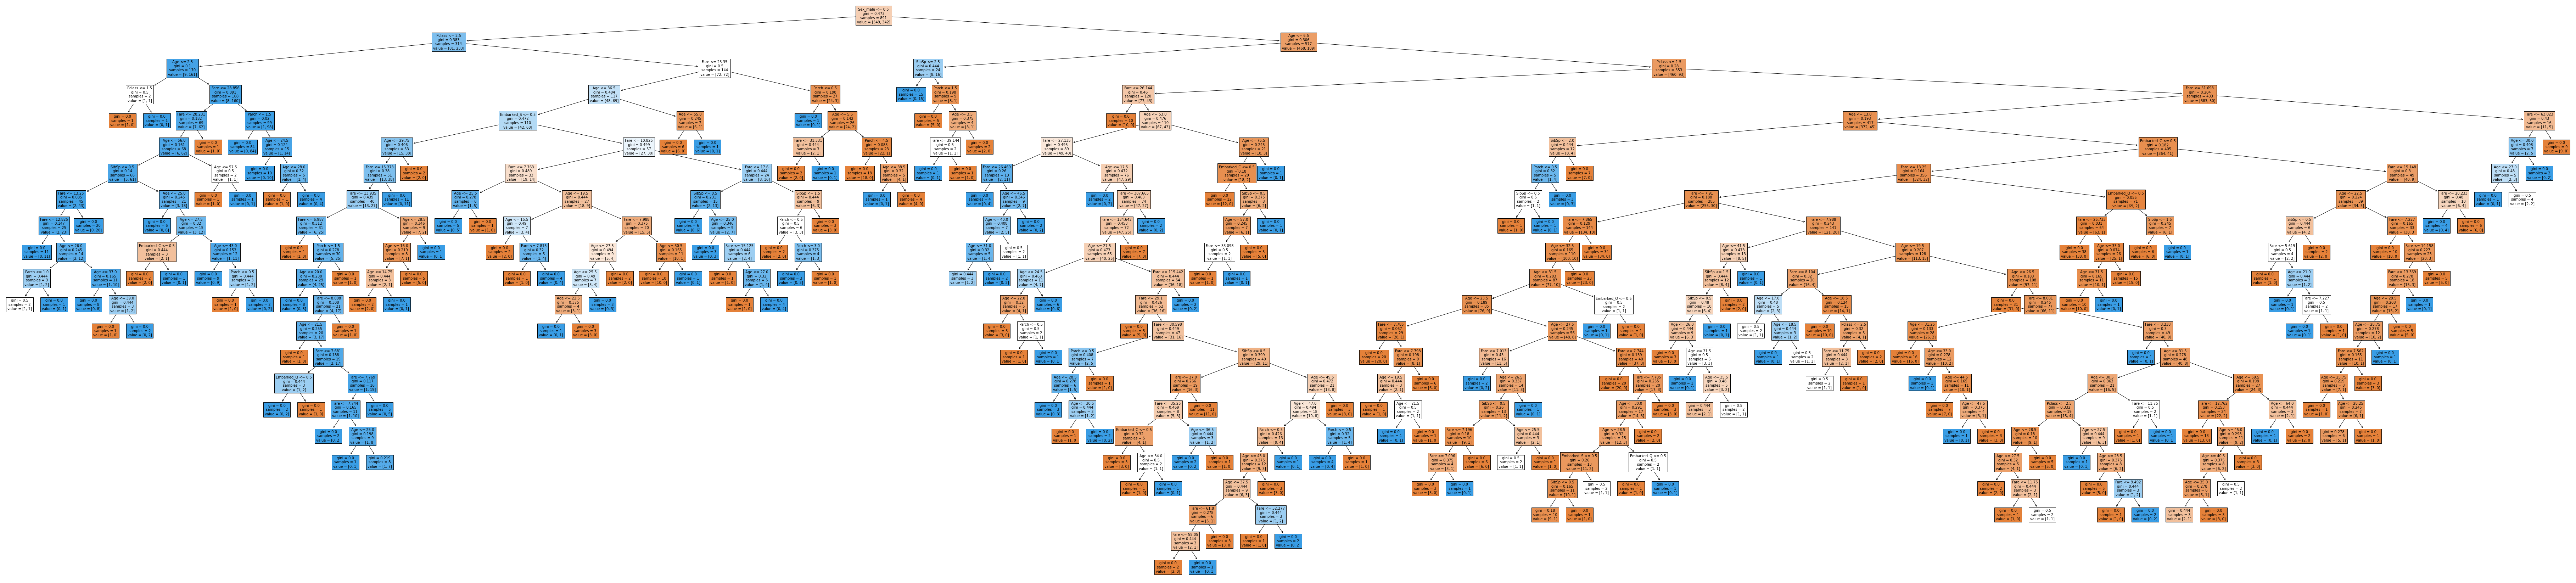

In [21]:
plt.figure(figsize=(130, 30))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

### Our tree grown too deep we should restrict max depth

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# Score для сэмпла, на котором мы тренировались
clf.score(X_train, y_train)

0.9798657718120806

In [25]:
# Кажется, мы переобучили дерево
clf.score(X_test, y_test)

0.7288135593220338

In [26]:
# Restric depth of tree classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8238255033557047
0.8203389830508474


In [28]:
scores_data = pd.DataFrame()

max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score]
    })
    
    scores_data = scores_data.append(temp)

In [29]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [30]:
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type',
                           value_name='score')

In [31]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.776271
194,96,test_score,0.762712
195,97,test_score,0.783051
196,98,test_score,0.776271


<AxesSubplot:xlabel='max_depth', ylabel='score'>

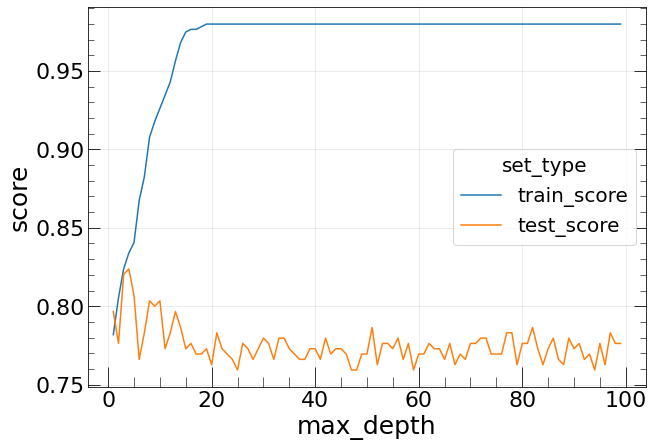

In [32]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

[Text(0.5, 0.875, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]\nclass = Died'),
 Text(0.25, 0.625, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]\nclass = Died'),
 Text(0.125, 0.375, 'SibSp <= 3.0\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]\nclass = Survived'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = Survived'),
 Text(0.1875, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Died'),
 Text(0.375, 0.375, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]\nclass = Died'),
 Text(0.3125, 0.125, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]\nclass = Died'),
 Text(0.4375, 0.125, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]\nclass = Died'),
 Text(0.75, 0.625, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]\nclass = Survived'),
 Text(0.625, 0.375, 'Age <= 2.5\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]\nclass = Survived'),
 Text(0.5625, 0.125, 'entropy = 1.0

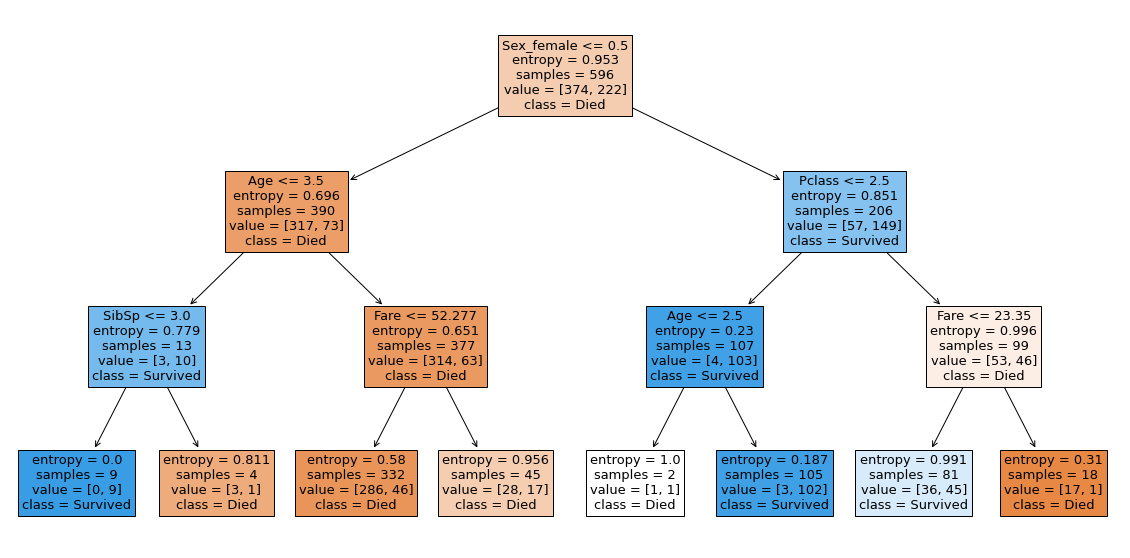

In [33]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
tree.plot_tree(clf,
               fontsize=13,
               feature_names=list(X),
               filled=True,
               class_names=['Died', 'Survived'])

## Crossvalidation

In [34]:
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
# Split train sample on 5 subsamples
# Train on 4 and test with 5th. 5 times with different test sample (1, 2, 3, 4, 5)
# For example [1, 2, 3, 4] - train, [5] - test
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [35]:
# Now with different depths
scores_data = pd.DataFrame()

max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'cross_val_score': [mean_cross_val_score]
    })
    
    scores_data = scores_data.append(temp)

In [36]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.803754


In [37]:
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type',
                           value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

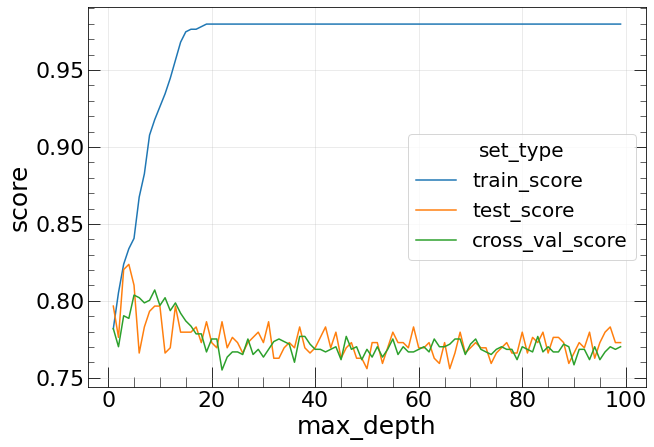

In [38]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [39]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.803754
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.807073
207,10,cross_val_score,0.796989


In [40]:
# Check the classifier score with train sample
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.8

### Now we tune parameters for Titanic calssification

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
clf = tree.DecisionTreeClassifier()
# parameters of model to optimise
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

np.random.seed(0)
# initialize model to search for the best parameters in cross validation
grid_search_cv_cls = GridSearchCV(clf, parameters, cv=5)

In [43]:
# run it
grid_search_cv_cls.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [44]:
# look at the best parameter (cross validation max precision)
print(grid_search_cv_cls.best_params_)
print(grid_search_cv_cls.best_score_)

{'criterion': 'entropy', 'max_depth': 11}
0.8087535014005601


In [45]:
# Now take best model from grid
best_clf = grid_search_cv_cls.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [46]:
best_clf.score(X_test, y_test)

0.7728813559322034

In [47]:
from sklearn.metrics import precision_score, recall_score

y_pred = best_clf.predict(X_test)

print(f'precision = {precision_score(y_test, y_pred)}')
print(f'recall = {recall_score(y_test, y_pred)}')

precision = 0.7476635514018691
recall = 0.6666666666666666


### Now we can adjust probability trashold for event to fall in one of calsses

In [48]:
# Probability of asssign the observation to one of the classes
# This 2d array
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

<AxesSubplot:>

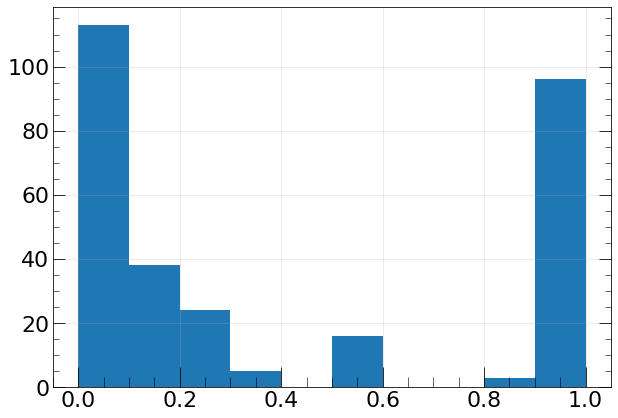

In [49]:
# Histogram of probability values of passengers to be alive
pd.Series(y_predicted_prob[:, 1]).hist()

In [50]:
# We can tightren the probability treshold for 'survived' == 1 category
# By default it's 0.5 but we can make it 0.8 for example

# change elements with value > 0.8 to 1, others to 0
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [51]:
print(f'precision (prob > 0.8) = {precision_score(y_test, y_pred)}')
print(f'recall (prob > 0.8) = {recall_score(y_test, y_pred)}')

precision (prob > 0.8) = 0.7878787878787878
recall (prob > 0.8) = 0.65


In [52]:
# change elements with value > 0.2 to 1, others to 0

y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)
print(f'New precision (prob > 0.2) = {precision_score(y_test, y_pred)}')
print(f'recall (prob > 0.2) = {recall_score(y_test, y_pred)}')

New precision (prob > 0.2) = 0.6875
recall (prob > 0.2) = 0.825


In [53]:
# All possible values of probability
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.57142857, 0.        , 0.13793103, 1.        , 0.85714286,
       0.08333333, 0.27272727, 0.28571429, 0.03488372, 0.5       ,
       0.22222222, 0.1627907 , 0.33333333, 0.6       ])

### Optimal probability threshold with ROC curve

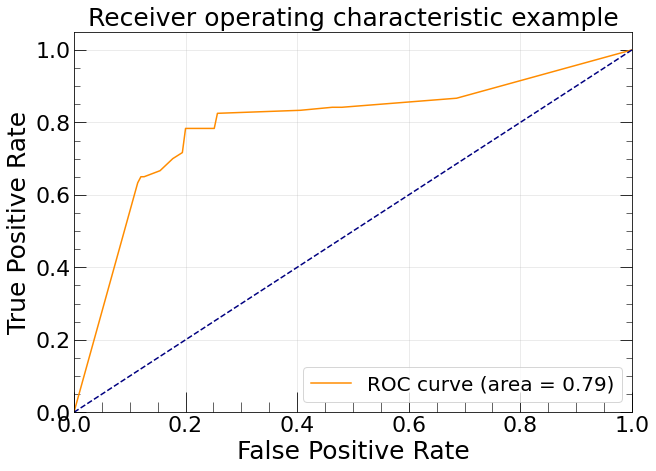

In [54]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Возвращаемся к этим данным и деревьям из главы 3

In [62]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,
                                  min_samples_split=100,
                                  min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

[Text(0.5, 0.875, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]\nclass = Died'),
 Text(0.2, 0.625, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]\nclass = Died'),
 Text(0.1, 0.375, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]\nclass = Survived'),
 Text(0.3, 0.375, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]\nclass = Died'),
 Text(0.2, 0.125, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]\nclass = Died'),
 Text(0.4, 0.125, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]\nclass = Died'),
 Text(0.8, 0.625, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]\nclass = Survived'),
 Text(0.7, 0.375, 'Fare <= 149.035\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]\nclass = Survived'),
 Text(0.6, 0.125, 'entropy = 0.149\nsamples = 94\nvalue = [2, 92]\nclass = Survived'),
 Text(0.8, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]\nclass = Survived'),
 Text(0.9, 0.375, 'entropy = 0.996\nsamples = 99\nvalu

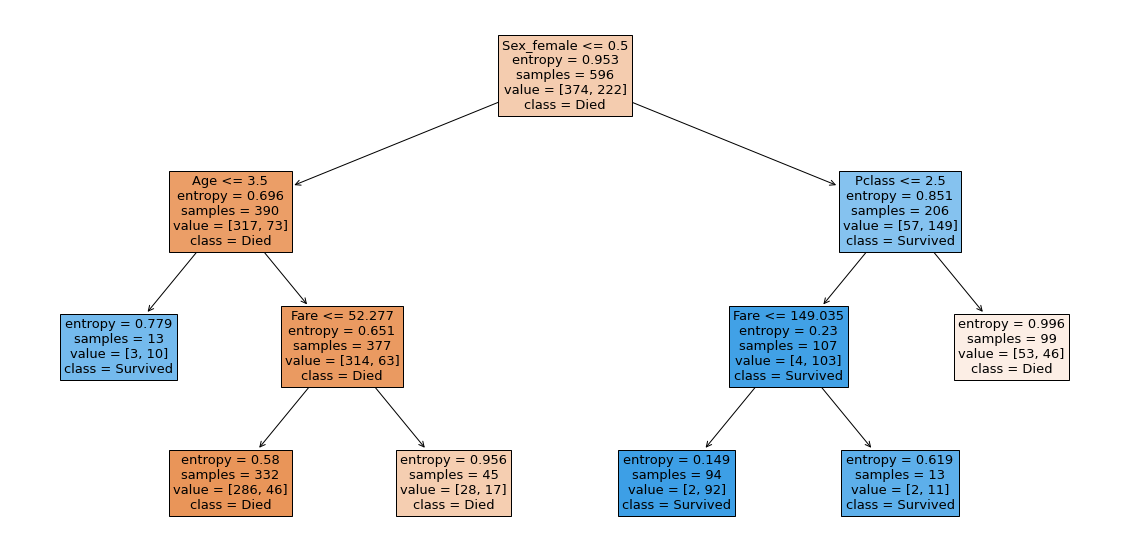

In [63]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf,
               fontsize=13,
               feature_names=list(X),
               filled=True,
               class_names=['Died', 'Survived'])

## Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
clf_rf = RandomForestClassifier()
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [66]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [70]:
display(grid_search_cv_clf.best_params_)
display(grid_search_cv_clf.best_score_)

{'max_depth': 5, 'n_estimators': 10}

0.8221988795518207

In [74]:
# Тренировочная задача
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
precision_score(predictions, y_test)

0.7

In [76]:
best_clf = grid_search_cv_clf.best_estimator_
print('precision score =', best_clf.score(X_test, y_test))
display(best_clf.feature_importances_)

precision score = 0.7966101694915254


array([0.12532843, 0.09343746, 0.0495945 , 0.02305537, 0.1823019 ,
       0.30589223, 0.16503308, 0.02817823, 0.00565941, 0.02151938])

In [81]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({
    'features': list(X_train),
    'feature_importances': feature_importances
})

# наиболее важные фичи
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.305892
4,Fare,0.182302
6,Sex_male,0.165033
0,Pclass,0.125328
1,Age,0.093437
2,SibSp,0.049594
7,Embarked_C,0.028178
3,Parch,0.023055
9,Embarked_S,0.021519
8,Embarked_Q,0.005659


### Данные о сердечнаых заболеваниях

In [84]:
heart_disease_data = pd.read_csv('heart-disease.csv')
display(heart_disease_data.head())

X_heart_disease = heart_disease_data.drop(columns=['target'])
y_heart_disease = heart_disease_data.target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X_heart_disease, y_heart_disease)
predictions = rf.predict(X_heart_disease)
print(precision_score(predictions, y_heart_disease))

0.9696969696969697


<AxesSubplot:>

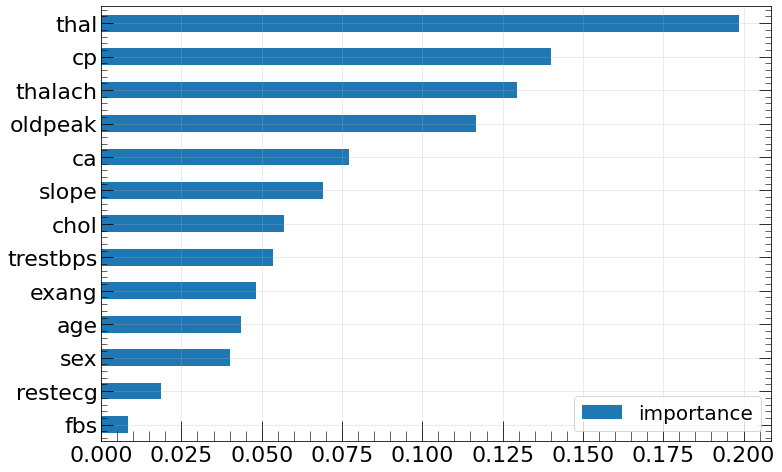

In [91]:
# График важности фичей
imp = pd.DataFrame(rf.feature_importances_, index=X_heart_disease.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

## Iris

In [191]:
iris_data_train = pd.read_csv('Iris_dataset/train_iris.csv')
display(iris_data_train.head(5))
iris_data_test = pd.read_csv('Iris_dataset/test_iris.csv')
display(iris_data_test.head(5))

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [192]:
X_train = iris_data_train[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_train = iris_data_train[['species']]
X_test = iris_data_test[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_test = iris_data_test[['species']]

In [206]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)

np.random.seed(0)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    #mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        #'cross_val_score': [mean_cross_val_score]
    })
    
    scores_data = scores_data.append(temp)

In [207]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [208]:
# Now we use melt to easily plot with sns lineplot
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'], # 'cross_val_score'
                           var_name='set_type',
                           value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<AxesSubplot:xlabel='max_depth', ylabel='score'>

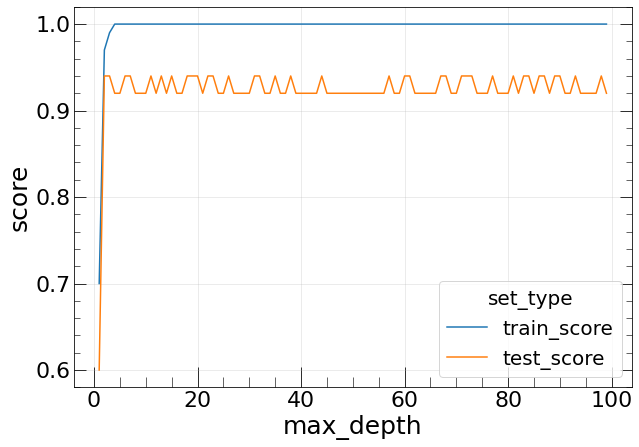

In [209]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

## Dogs and cats

In [211]:
data_dogs_cats = pd.read_csv('dogs_n_cats.csv')
data_dogs_cats.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [218]:
X_train = data_dogs_cats[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y_train = data_dogs_cats['Вид'].replace({'собачка': 0, 'котик': 1})

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)

In [235]:
data_dogs_cats_test = pd.read_json('dataset_209691_15.txt')
data_dogs_cats_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,30,36.0,1,1,0
1,30,36.0,1,0,0
2,20,24.0,1,1,0
3,27,32.4,1,1,0
4,28,33.6,1,1,0


In [240]:
X_test = data_dogs_cats_test[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
(clf.predict(X_test) == 0).sum()

46

In [228]:
X = data_dogs_cats[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = data_dogs_cats['Вид'].replace({'собачка': 0, 'котик': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [229]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.75, 'Высота <= 11.8\nentropy = 1.0\nsamples = 670\nvalue = [331, 339]\nclass = Cat'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 339\nvalue = [0, 339]\nclass = Cat'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 331\nvalue = [331, 0]\nclass = Dog')]

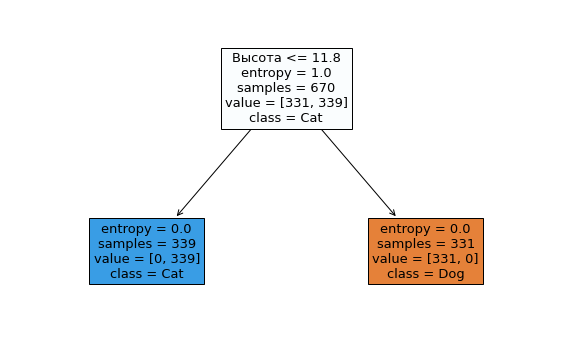

In [243]:
plt.figure(figsize=(10, 6))
tree.plot_tree(clf,
               fontsize=13,
               feature_names=list(X),
               filled=True,
               class_names=['Dog', 'Cat'])

In [223]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 20)

np.random.seed(0)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
    })
    
    scores_data = scores_data.append(temp)

In [242]:
display(scores_data.head())
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'], # 'cross_val_score'
                           var_name='set_type',
                           value_name='score')
display(scores_data_long.head())

,max_depth,train_score,test_score
0,1,1.0,1.0
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0


,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0


## Model quality metrics

<font size="3">

Precision in HEP -> (1 - fake_rate) <br>
Recall in HEP -> efficiency <br><br>
    
</font>

<font size="4">
$Precision = \frac{TP}{TP + FP}$ <br>

$Recall = \frac{TP}{TP + FN}$ <br>
    
    
F1 score <br>
$F1 = 2 \times (precision \times recall) ~/~ (precision + recall)$
</font>

In [245]:
# Ex 1
TP = 15
FP = 15
FN = 30

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
print(f'precision = {precision}, recall = {recall}, f1 = {f1}')

precision = 0.5, recall = 0.3333333333333333, f1 = 0.4


### Songs
Нужно предсказать автора песни, основываясь на некоторых параметрах её текста

In [248]:
songs_data = pd.read_csv('songs.csv')
songs_data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [250]:
X = songs_data[['length', 'commas', 'exclamations', 'colons', 'hyphens']]
y = songs_data['artist']

In [271]:
y.unique()

array(['gangstarr', 'blind-guardian', 'abba'], dtype=object)

In [273]:
y = y.replace({'abba': 1, 'blind-guardian': 2, 'gangstarr': 3})

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### First we simply try with one tree

In [275]:
cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

0.6974789915966386

In [280]:
# predictuon of model for test smaple and actual bands
y_predicted = cls.predict(X_test)
display(y_predicted)
display(y_test.values)

array([2, 1, 2, 1, 1, 3, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 3, 2, 2, 1, 3, 1, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2,
       2, 2, 1, 2, 3, 1, 2, 1, 3, 1, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 3, 2,
       2, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 2,
       2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 3, 3, 1, 2, 3, 3,
       3, 1, 1, 3, 2, 1, 1, 1, 3])

array([1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 3, 2, 2, 3, 2, 1, 1, 2, 1,
       3, 1, 1, 3, 1, 3, 2, 2, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 2, 3, 2,
       2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 3, 3, 1, 3, 2, 2, 3, 2, 1, 3, 1,
       2, 2, 1, 3, 3, 2, 3, 1, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 1, 1, 3, 2,
       2, 3, 2, 2, 1, 2, 1, 2, 1, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 2, 3, 3,
       3, 1, 2, 3, 1, 3, 3, 1, 3])

In [282]:
# That's how we calculate precision
precision_score(y_test.values, y_predicted, average='micro')

0.6974789915966386

### Now try it with differen max depths

In [289]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 25)

np.random.seed(0)

for max_depth in max_depth_values:
    cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    cls.fit(X_train, y_train)
    train_score = cls.score(X_train, y_train)
    test_score = cls.score(X_test, y_test)
    y_predicted = cls.predict(X_test)
    precision = precision_score(y_test.values, y_predicted, average='micro')
    
    #mean_cross_val_score = cross_val_score(cls, X_train, y_train, cv=5).mean()

    temp = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'precision': [precision],
    })
    
    scores_data = scores_data.append(temp)

In [291]:
scores_data.head(20)

,max_depth,train_score,test_score,precision
0,1,0.618257,0.596639,0.596639
0,2,0.713693,0.672269,0.672269
0,3,0.726141,0.655462,0.655462
0,4,0.784232,0.647059,0.647059
0,5,0.813278,0.638655,0.638655
0,6,0.871369,0.672269,0.672269
0,7,0.908714,0.663866,0.663866
0,8,0.933610,0.697479,0.697479
0,9,0.954357,0.705882,0.705882
0,10,0.966805,0.697479,0.697479


<AxesSubplot:xlabel='max_depth', ylabel='value'>

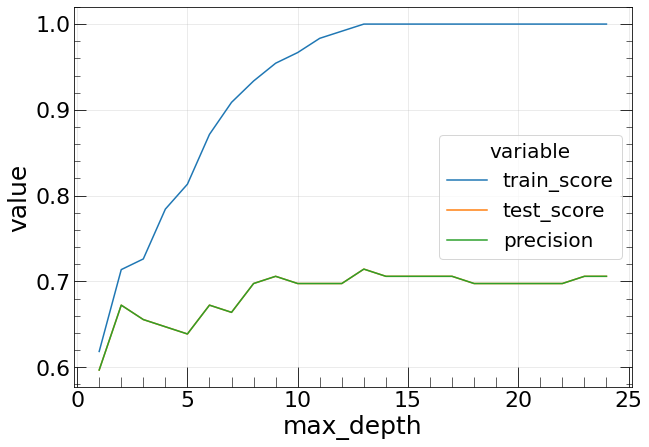

In [298]:
# Ok, let's say max_depth=8 is good

sns.lineplot(x='max_depth', y='value', hue='variable', 
             data=pd.melt(scores_data, ['max_depth']))

In [343]:
max_depths = np.arange(1,30)
depth_precision = []

np.random.seed(0)
for i in max_depths:
    cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    cls.fit(X_train, y_train)
    #cls.score(X_test, y_test)
    y_predicted = cls.predict(X_test)
    precision_test = precision_score(y_test.values, y_predicted, average='micro')
    depth_precision.append([i, precision_test])
    
depth_precision = np.array(depth_precision)
max_pos = depth_precision[:, 1].argmax()
depth = int(depth_precision[12][0])

cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

predictions = cls.predict(X_test)
precision = precision_score(y_test.values, predictions, average='micro')
precision

0.7142857142857143

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

cls = DecisionTreeClassifier(criterion='entropy', max_depth=5)
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

predictions = cls.predict(X_test)
precision = precision_score(y_test.values, predictions, average='micro')

# Practice with decision trees

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [430]:
heart_disease_data = pd.read_csv('train_data_tree.csv')
heart_disease_data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [431]:
X_train = heart_disease_data[['sex', 'exang']]
y_train = heart_disease_data['num']

In [432]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'exang <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]\nclass = Zero'),
 Text(0.25, 0.5, 'sex <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]\nclass = Zero'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]\nclass = Zero'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]\nclass = Zero'),
 Text(0.75, 0.5, 'sex <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]\nclass = One'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]\nclass = One'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]\nclass = One')]

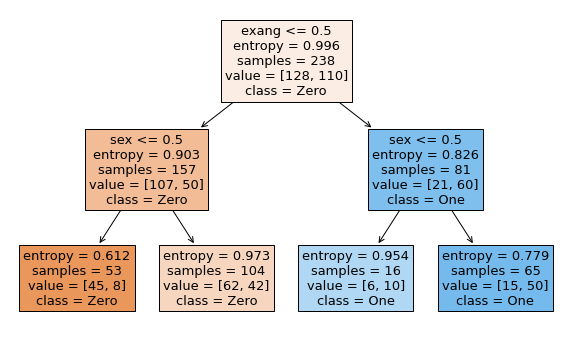

In [439]:
plt.figure(figsize=(10, 6))
tree.plot_tree(clf,
               fontsize=13,
               feature_names=list(X_train),
               filled=True,
               class_names=['Zero', 'One'])

In [450]:
prob1_init = y_train.sum() / y_train.count()
prob0_init= 1 - prob1_init
print(f'Initial entropy = {round(entropy([prob0_init, prob1_init]), 3)}')

entropy_init = 0.996
entropy_0 = 0.903
entropy_1 = 0.826
entropies = np.array([entropy_0, entropy_1])
n_obs = np.array([157, 81])

# function defined above
print(f'IG = {round(infromation_gain(entropy_init, n_obs, entropies),3)}')

Initial entropy = 0.996
IG = 0.119


In [486]:
# How to get these parameters from tree
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

# 0 - индекс корня
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
r_node = clf.tree_.children_right[0]
n = clf.tree_.n_node_samples[0] # суммарное кол-во сэмплов
n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
n2 = clf.tree_.n_node_samples[r_node]
e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
e2 = clf.tree_.impurity[r_node]
e0 = clf.tree_.impurity[0] # энтропия исходного состояния в 0 узле дерева

infromation_gain(e0, np.array([n1, n2]), np.array([e1, e2]))

0.11939340343891591

In [496]:
from sklearn import datasets

iris_data = datasets.load_iris()
X = iris_data['data']
y = iris_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [504]:
cls = tree.DecisionTreeClassifier()
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)
display(predictions)
precision = precision_score(y_test, predictions, average='micro')
print(f'precision score =', precision)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

precision score = 1.0


### GridSearchCV with Iris

In [531]:
clf = tree.DecisionTreeClassifier()

# parameters of model to optimise
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}

np.random.seed(0)
# initialize model to search for the best parameters in cross validation
search = GridSearchCV(clf, parameters, cv=5)

# run it
search.fit(X_train, y_train)

# look at the best parameter (cross validation max precision)
print(search.best_params_)
print(search.best_score_)

# Now take best model from grid
best_tree = search.best_estimator_
best_tree

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}
0.9545454545454547


DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=4)

### RandomizedSearchCV

In [543]:
from sklearn.model_selection import RandomizedSearchCV

clf = tree.DecisionTreeClassifier()

# parameters of model to optimise
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}

np.random.seed(0)
# initialize model to search for the best parameters in cross validation
search = RandomizedSearchCV(clf, parameters, cv=5)

# run it
search.fit(X_train, y_train)

# look at the best parameter (cross validation max precision)
print(search.best_params_)
print(search.best_score_)

# Now take best model from grid
best_tree = search.best_estimator_
best_tree

{'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 9, 'criterion': 'entropy'}
0.9545454545454547


DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=8)

In [561]:
train = pd.read_csv('Titanic_dataset/train.csv')
train = train.rename(columns={'Survived': 'y'})
test = pd.read_csv('Titanic_dataset/test.csv')

#
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1).dropna()\
    .replace({'female': 0 , 'male': 1}).replace({'S': 1, 'C': 2, 'Q': 3})
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1).dropna()\
    .replace({'female': 0 , 'male': 1}).replace({'S': 1, 'C': 2, 'Q': 3})
#
X = train.drop(['y'], axis=1)
y = train.y

In [565]:
cls = tree.DecisionTreeClassifier()
parameters = parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}

search = GridSearchCV(cls , param_grid=parameters, cv=5)
search.fit(X, y)

print(search.best_params_)
print(search.best_score_)

best_tree = search.best_estimator_
predictions = best_tree.predict(test)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8117896188318724


array([[389,  35],
       [ 68, 220]])

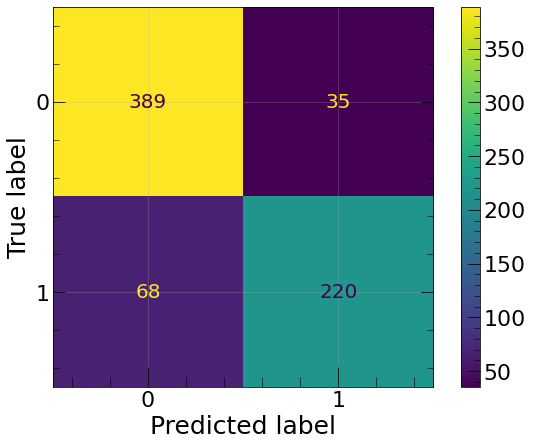

In [570]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions_train = best_tree.predict(X)
conf_matrix = confusion_matrix(y, predictions_train)
display(conf_matrix)
ConfusionMatrixDisplay(conf_matrix).plot()

## Mushrooms

In [96]:
mashrooms_data = pd.read_csv('training_mush.csv')
print(f'data consists of {mashrooms_data.shape[1]} columns and {mashrooms_data.shape[0]} rows')
mashrooms_data.head()

data consists of 23 columns and 6093 rows


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [102]:
# Смертельные и несмертельные?
display(mashrooms_data['class'].unique())

# Фичи и таргет
X_train = mashrooms_data.drop(columns=['class'])
y_train = mashrooms_data['class']

array([0, 1])

In [111]:
%%time

# Заведём random forest
cls_rf = RandomForestClassifier(random_state=0)

# Парметры леса для перебора
parameters = {'n_estimators': np.arange(10, 60, 10),
              'max_depth': np.arange(1, 12, 2),
              'min_samples_leaf': np.arange(1, 7),
              'min_samples_split': np.arange(2, 9, 2)
             }

# Заводим сетку для поиска парметров
grid_search_rf = GridSearchCV(cls_rf, param_grid=parameters, cv=3, n_jobs=-1)

# И фитируем данные
grid_search_rf.fit(X_train, y_train)

CPU times: user 3min 6s, sys: 2.2 s, total: 3min 8s
Wall time: 3min 8s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 20, 30, 40, 50])})

In [112]:
# Посмотрим наилучшую модель и её параметры
grid_search_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [121]:
# Теперь посмотрим на важность фичей
best_rf = grid_search_rf.best_estimator_
feature_impotance_df = pd.DataFrame({
    'feature': list(X_train),
    'feature_importance': best_rf.feature_importances_
})
feature_impotance_df = feature_impotance_df.sort_values('feature_importance', ascending=False)\
    .reset_index().drop(['index'], axis=1)

In [123]:
feature_impotance_df.head()

,feature,feature_importance
0,odor,0.188376
1,gill-color,0.103861
2,stalk-root,0.103793
3,spore-print-color,0.083564
4,gill-spacing,0.080840


In [125]:
# Теперь возмём тренировочные данные и проверим съедобность неизвестных грибов
mashrooms_data_test = pd.read_csv('testing_mush.csv')
mashrooms_data_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [129]:
n_inedible = best_rf.predict(mashrooms_data_test).sum()
print(f'number on inedible shrooms in test data = {n_inedible}')

number on inedible shrooms in test data = 976


array([[1055,    0],
       [   0,  976]])

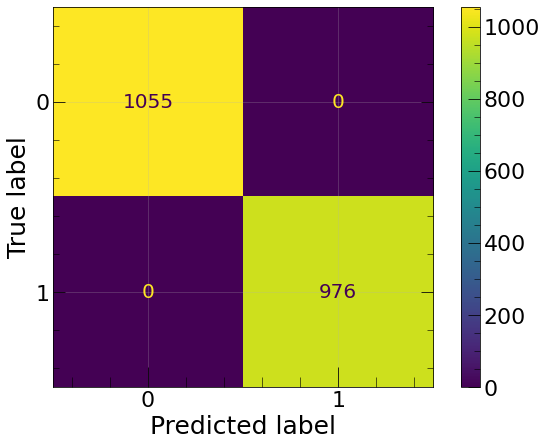

In [132]:
# Тперь построим confusion matrix используя данные о реальной съедобности грибов из тестового сэмпла
# и предасказаниями

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_predicted = best_rf.predict(mashrooms_data_test)
y_true = pd.read_csv('testing_y_mush.csv')['class']

conf_matrix = confusion_matrix(y_true, y_predicted)
display(conf_matrix)
ConfusionMatrixDisplay(conf_matrix).plot()

## Aliens ivasion

In [133]:
invasion_data_train = pd.read_csv('invasion.csv')
invasion_data_test = pd.read_csv('operative_information.csv')
invasion_data_train.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [148]:
# Заменим class на числовые значения
spaceship_dict = {k: v for k,v in zip(invasion_data_train['class'].unique(), np.arange(3))}
invasion_data_train['class'].replace(spaceship_dict)

3

In [151]:
%%time
# Решил пока не менять, вдруг без этого сработает

X_train = invasion_data_train.drop(columns=['class'])
y_train = invasion_data_train['class']

cls_rf = RandomForestClassifier(random_state=0)

# Парметры леса для перебора
parameters = {'n_estimators': np.arange(10, 60, 10),
              'max_depth': np.arange(1, 12, 2),
              'min_samples_leaf': np.arange(1, 7),
              'min_samples_split': np.arange(2, 9, 2)
             }

# Заводим сетку для поиска парметров
grid_search_rf = GridSearchCV(cls_rf, param_grid=parameters, cv=3, n_jobs=-1)

# И фитируем данные
grid_search_rf.fit(X_train, y_train)

CPU times: user 12.7 s, sys: 348 ms, total: 13.1 s
Wall time: 1min 10s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 20, 30, 40, 50])})

In [154]:
print(grid_search_rf.best_params_)
best_cls = grid_search_rf.best_estimator_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [159]:
spaceships_predicted = best_cls.predict(invasion_data_test)
spaceships_predicted = pd.Series(spaceships_predicted)
spaceships_predicted.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [162]:
# Наиболее важные фичи
feature_importance = pd.DataFrame({'feature':list(X_train), 
                                   'feature_importance': best_cls.feature_importances_
                                  })
feature_importance.sort_values(by='feature_importance', ascending=False).head()

,feature,feature_importance
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723


### Dangerous places at space

In [164]:
danger_data = pd.read_csv('space_can_be_a_dangerous_place.csv')
danger_data

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [168]:
%%time

X_train = danger_data.drop(columns=['dangerous'])
y_train = danger_data.dangerous

cls_rf = RandomForestClassifier(random_state=0)

# Парметры леса для перебора
parameters = {'n_estimators': np.arange(10, 40, 10),
              'max_depth': np.arange(1, 9, 2),
              'min_samples_leaf': np.arange(1, 7),
              'min_samples_split': np.arange(2, 9, 2)
             }

# Заводим сетку для поиска парметров
grid_search_rf = GridSearchCV(cls_rf, param_grid=parameters, cv=3, n_jobs=-1)

# И фитируем данные
grid_search_rf.fit(X_train, y_train)

CPU times: user 9.63 s, sys: 664 ms, total: 10.3 s
Wall time: 6min


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([1, 3, 5, 7]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 20, 30])})

In [174]:
best_clf = grid_search_rf.best_estimator_
feature_importance = pd.DataFrame({
    'importance': best_clf.feature_importances_,
    'feature': best_clf.feature_names_in_
})
feature_importance.sort_values('importance', ascending=False)

,importance,feature
5,0.519587,buggers_were_noticed
6,0.438095,nearby_system_has_planemo
4,0.014578,black_hole_is_near
3,0.008541,dustiness
2,0.006830,peradventure_index
0,0.006766,r
1,0.005603,phi


### Ещё pandas

In [175]:
movie_data = pd.read_csv('movie_metadata.csv')
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [178]:
genres = movie_data[['movie_title', 'genres']]
genres.head()

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary


In [179]:
# reverse string
def reversator(value):
    return value[::-1]

In [188]:
for i, row in genres.iterrows():
    print(row.map(reversator))

movie_title                             ratavA
genres         iF-icS|ysatnaF|erutnevdA|noitcA
Name: 0, dtype: object
movie_title     dnE s'dlroW tA :naebbiraC eht fo setariP
genres                          ysatnaF|erutnevdA|noitcA
Name: 1, dtype: object
movie_title                      ertcepS
genres         rellirhT|erutnevdA|noitcA
Name: 2, dtype: object
movie_title     sesiR thginK kraD ehT
genres                rellirhT|noitcA
Name: 3, dtype: object
movie_title                 snekawA ecroF ehT - IIV edosipE :...
genres                                               yratnemucoD
Name: 4, dtype: object
movie_title                retraC nhoJ
genres         iF-icS|erutnevdA|noitcA
Name: 5, dtype: object
movie_title                3 naM-redipS
genres         ecnamoR|erutnevdA|noitcA
Name: 6, dtype: object
movie_title                                              delgnaT
genres         ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitamin...
Name: 7, dtype: object
movie_title     nortlU fo egA :s

movie_title                 terceS ehT
genres                  rellirhT|amarD
Name: 4015, dtype: object
movie_title               31:2
genres         rellirhT|rorroH
Name: 4016, dtype: object
movie_title     2 traP ,snruteR thginK kraD ehT :namtaB
genres           rellirhT|iF-icS|emirC|noitaminA|noitcA
Name: 4017, dtype: object
movie_title     esoohC ot emiT
genres             yratnemucoD
Name: 4018, dtype: object
movie_title     boJ tsaL ehT :gniK eht fo emaN eht nI
genres              rellirhT|ysatnaF|erutnevdA|noitcA
Name: 4019, dtype: object
movie_title                   doolB dekciW
genres         rellirhT|amarD|emirC|noitcA
Name: 4020, dtype: object
movie_title       lortaP nwaD
genres         rellirhT|amarD
Name: 4021, dtype: object
movie_title           nodnoL fo sdroL
genres         rellirhT|yretsyM|emirC
Name: 4022, dtype: object
movie_title     yteixnA hgiH
genres                ydemoC
Name: 4023, dtype: object
movie_title     sniugneP eht fo hcraM
genres                    

In [190]:
for i, col in genres.iteritems():
    print(col.map(reversator))

0                                                  ratavA
1                dnE s'dlroW tA :naebbiraC eht fo setariP
2                                                 ertcepS
3                                   sesiR thginK kraD ehT
4                    snekawA ecroF ehT - IIV edosipE :...
                              ...                        
5038                              derevileD delaeS dengiS
5039                                        gniwolloF ehT
5040                                 tnasaelP oS eugalP A
5041                                     gnillaC iahgnahS
5042                                    werD htiw etaD yM
Name: movie_title, Length: 5043, dtype: object
0       iF-icS|ysatnaF|erutnevdA|noitcA
1              ysatnaF|erutnevdA|noitcA
2             rellirhT|erutnevdA|noitcA
3                       rellirhT|noitcA
4                           yratnemucoD
                     ...               
5038                       amarD|ydemoC
5039       rellirhT|yretsyM|amarD|e

### Методы apply, applymap, transform

In [191]:
budget = movie_data[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [193]:
budget.applymap(lambda x: x + 1).head()

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN


In [195]:
budget.apply(np.mean, axis=0)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [196]:
budget.apply(lambda x: x + 1, axis=0).head()

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN


In [197]:
budget.transform(lambda x: x + 1, axis=0).head()

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN


In [198]:
def mm(col):
    return np.mean(col) + 1

In [199]:
budget.apply(mm)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [200]:
budget.mean() + 1

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [201]:
# Возвращает таблицу в виде numpy array
budget.values

array([[2.37e+08, 1.78e+02],
       [3.00e+08, 1.69e+02],
       [2.45e+08, 1.48e+02],
       ...,
       [1.40e+03, 7.60e+01],
       [     nan, 1.00e+02],
       [1.10e+03, 9.00e+01]])

In [207]:
np.mean(budget['budget'].dropna().values)

39752620.436387606

In [213]:
%%timeit
budget.mean(axis=0)

725 µs ± 68.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [214]:
%%timeit
budget.describe().loc['mean']

8.42 ms ± 502 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [215]:
%%timeit
budget.apply(np.mean)

966 µs ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [217]:
%%timeit
budget.apply('mean')

748 µs ± 38.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Time series

In [220]:
stock_data = pd.read_csv('amzn_stock.csv', index_col='Date', parse_dates=True)
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [221]:
stock_data.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [222]:
stock_data['2010']

/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2010-12-27,181.90,183.14,180.45,182.14,2249734
2010-12-28,182.10,182.77,181.05,181.09,1975718
2010-12-29,181.80,184.35,180.41,183.37,3122379


In [224]:
stock_data['2010-02':'2010-05']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2010-05-24,122.57,124.50,120.65,122.12,4544265
2010-05-25,118.54,125.19,118.50,124.86,7121633
2010-05-26,125.05,125.79,122.30,123.21,6968764


In [227]:
# Aggregate data to smaller or greater scale
# Here is aggregation to 2 hours
stock_data.resample('2h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 20:00:00,NaN,NaN,NaN,NaN,NaN


In [228]:
# Here is aggregation to 1 week and mean per week
stock_data.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


In [229]:
stock_data.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
2010-01-11,132.62,132.80,129.21,130.31,8786668
2010-01-12,128.99,129.82,126.55,127.35,9098190
2010-01-13,127.90,129.71,125.75,129.11,10727856
2010-01-14,129.14,130.38,126.40,127.35,9788435


In [231]:
# Apply mean to the window of data (olling window)
stock_data.rolling(3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [232]:
# mean value from first 1, 2, 3, 4 observations and so on 
stock_data.expanding().mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [233]:
# mean value from 3, 4, 5 observations and so on 
stock_data.expanding(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [234]:
stock_data.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


<AxesSubplot:xlabel='Date'>

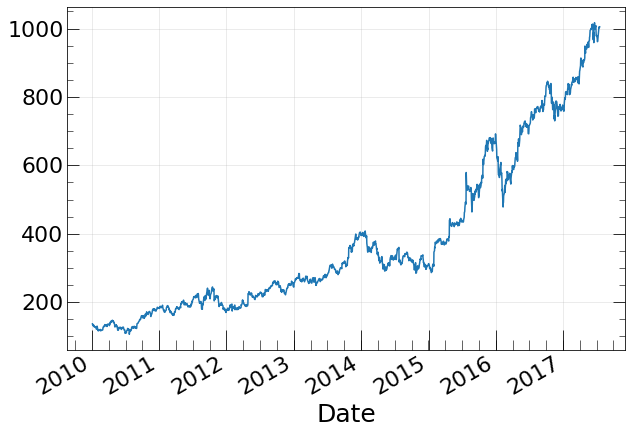

In [235]:
stock_data['Open'].plot()

<AxesSubplot:xlabel='Date'>

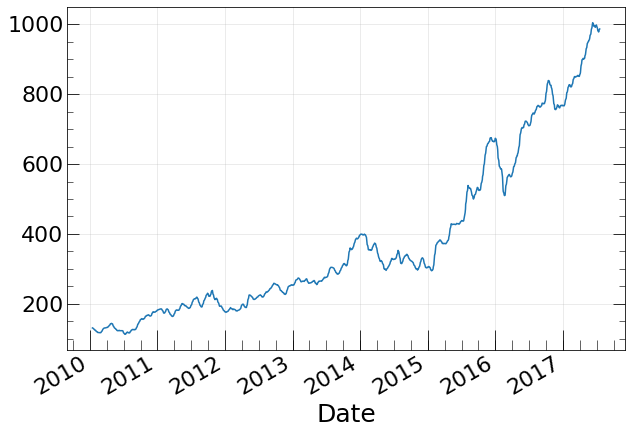

In [239]:
# We can make this function smooth using windo function
ns = stock_data['Open'].rolling(10, min_periods=10).mean()
ns.plot()

In [259]:
stock_data.expanding().sum()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7.600543e+06
2010-01-05,269.68,272.09,264.95,268.59,1.645700e+07
2010-01-06,404.28,406.82,396.60,400.84,2.363798e+07
2010-01-07,536.29,539.14,525.40,530.84,3.466810e+07
2010-01-08,666.85,672.82,654.43,664.36,4.450193e+07
...,...,...,...,...,...
2017-07-11,712809.96,719868.39,705062.36,712892.68,8.578794e+09
2017-07-12,713810.61,720876.94,706060.46,713899.19,8.582402e+09
2017-07-13,714815.23,721883.82,707056.36,714899.82,8.585283e+09


In [260]:
stock_data.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            0, 2, 3, 4, 0, 1, 2, 3, 4, 0],
           dtype='int64', name='Date', length=1896)

In [262]:
stock_data.index.weekday.value_counts()

2    390
1    389
3    382
4    380
0    355
Name: Date, dtype: int64

In [263]:
stock_data.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July'],
      dtype='object', name='Date', length=1896)

In [265]:
stock_data.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=1896)

In [268]:
np.mean(stock_data.index.dayofyear)

178.00632911392404

In [269]:
stock_data.index.day.value_counts()

23    65
8     65
9     65
10    65
11    65
12    65
13    65
14    64
7     64
17    63
22    63
6     63
19    63
15    63
21    62
16    62
28    62
5     62
3     62
27    62
2     61
20    61
24    61
18    60
26    60
4     59
29    58
1     58
25    57
30    56
31    35
Name: Date, dtype: int64